# Considerações:
- Exemplo usando Embeddings

# Embeddings: O que são?


Embeddings são representações vetoriais de elementos como palavras, frases, documentos ou outros tipos de dados em um espaço de alta dimensão. Em processamento de linguagem natural (PLN), embeddings transformam dados textuais em vetores numéricos que podem ser utilizados como entrada para modelos de aprendizado de máquina. A principal ideia é capturar a semântica e as relações entre elementos no espaço vetorial.

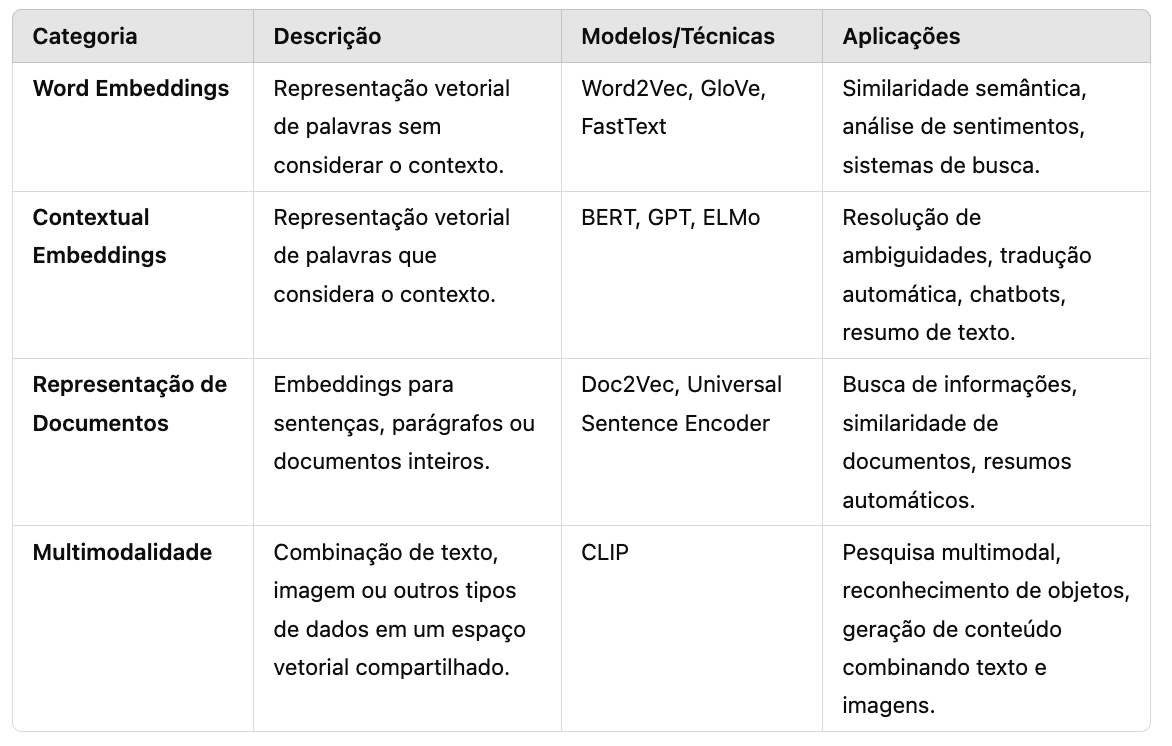

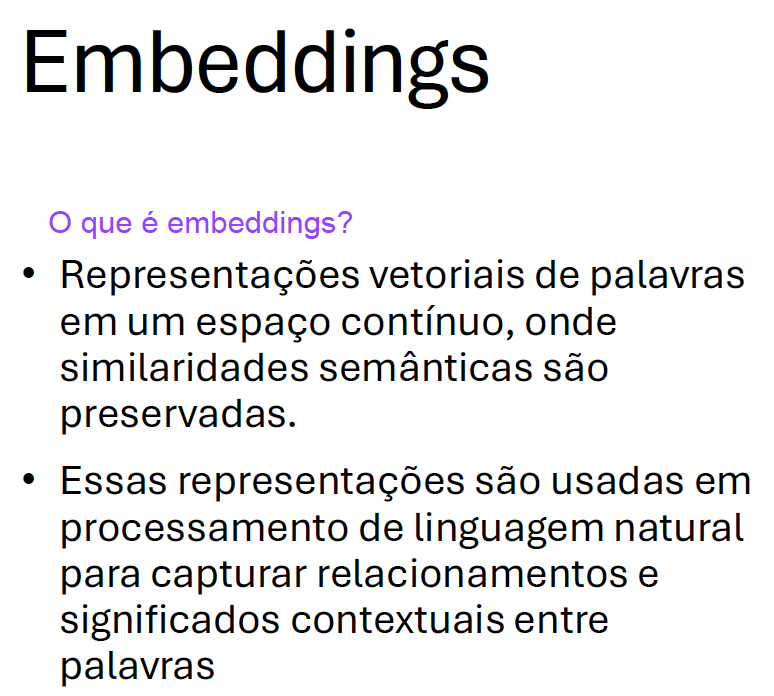

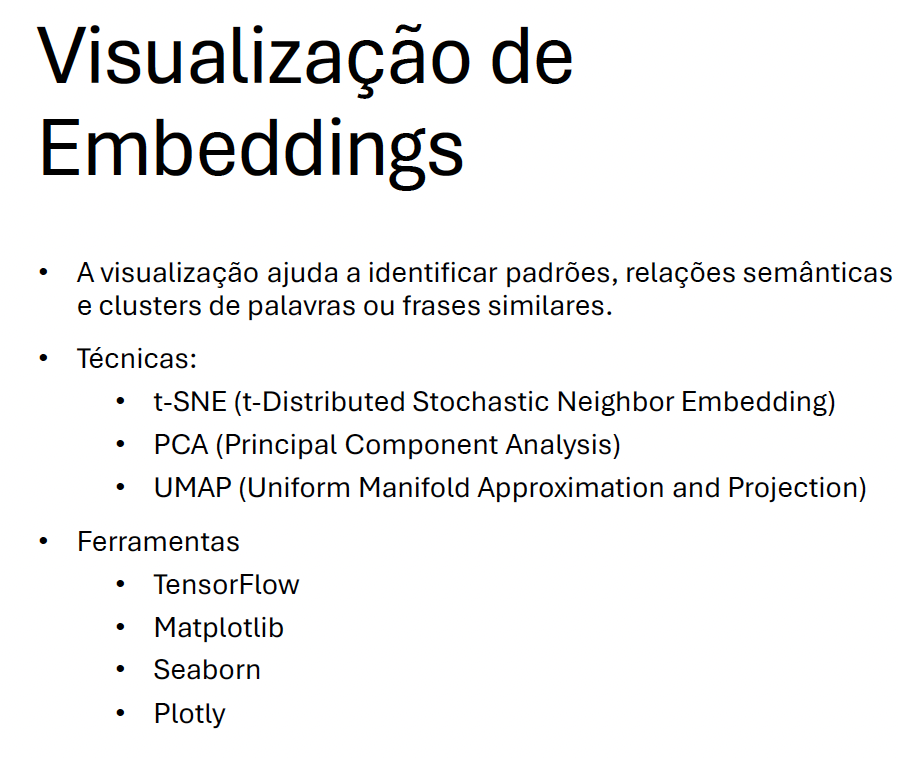

## Principais Características

- Dimensionalidade Reduzida:
    - Embeddings mapeiam dados para um espaço de dimensão fixa (geralmente menor que o tamanho original), o que facilita o processamento.

- Captura de Relações Semânticas:
    - Palavras ou conceitos com significados semelhantes possuem vetores próximos no espaço vetorial.

- Generalização:
    - Os embeddings aprendem representações generalizadas a partir de grandes volumes de dados, tornando-os úteis para diversas tarefas de NLP.

- Aprendizagem Contextual:
    - Modelos modernos, como BERT ou GPT, produzem embeddings contextuais, onde o significado de uma palavra depende de seu contexto na frase.

- Treinamento Prévio ou Adaptação:
    - Embeddings podem ser pré-treinados em grandes corpora (como Word2Vec ou GloVe) ou ajustados em tarefas específicas (fine-tuning).

## Formas de Medir a Distância

A proximidade ou similaridade entre embeddings pode ser avaliada por medidas de distância. Uma das mais comuns é a distância do cosseno:

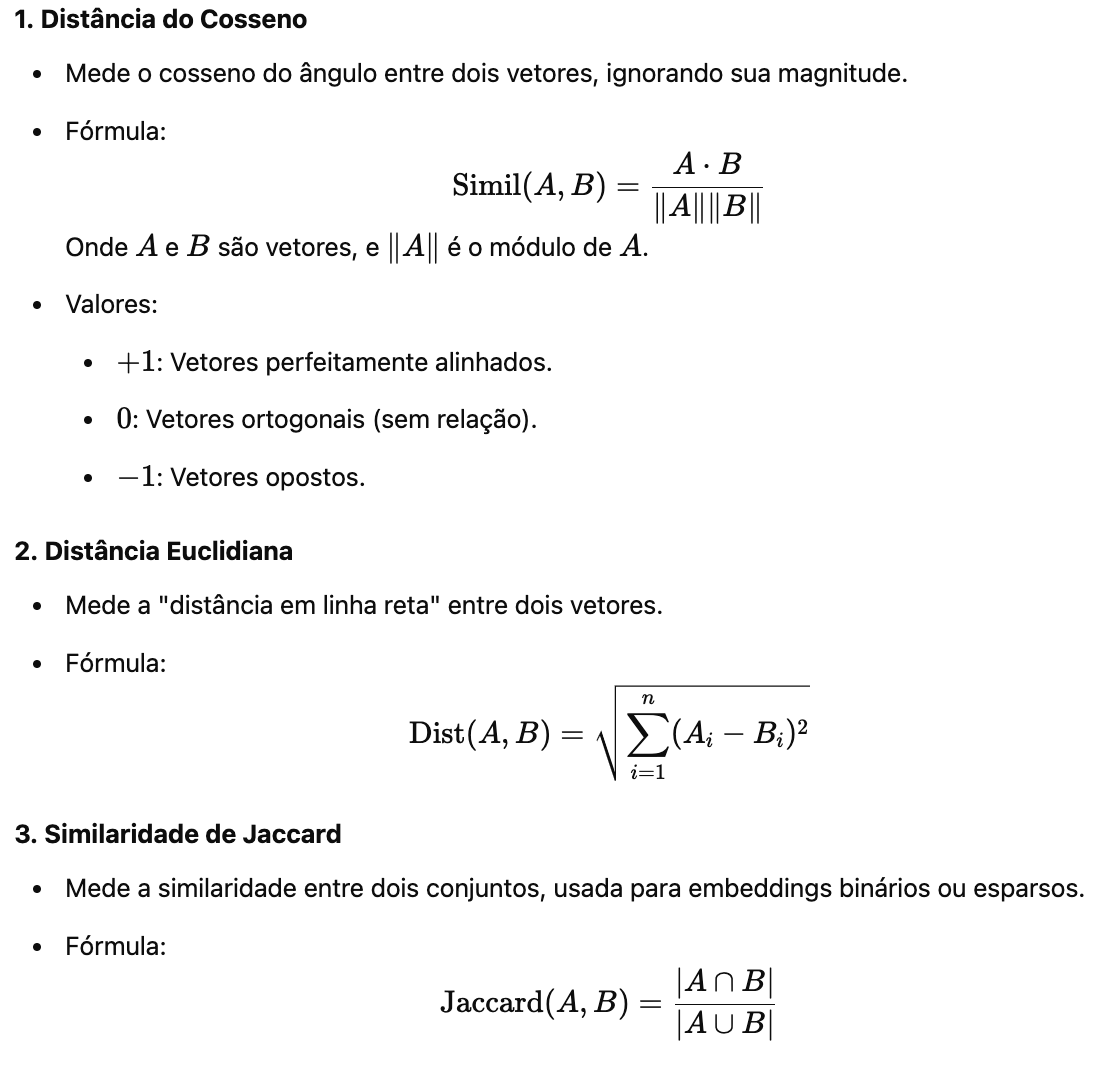

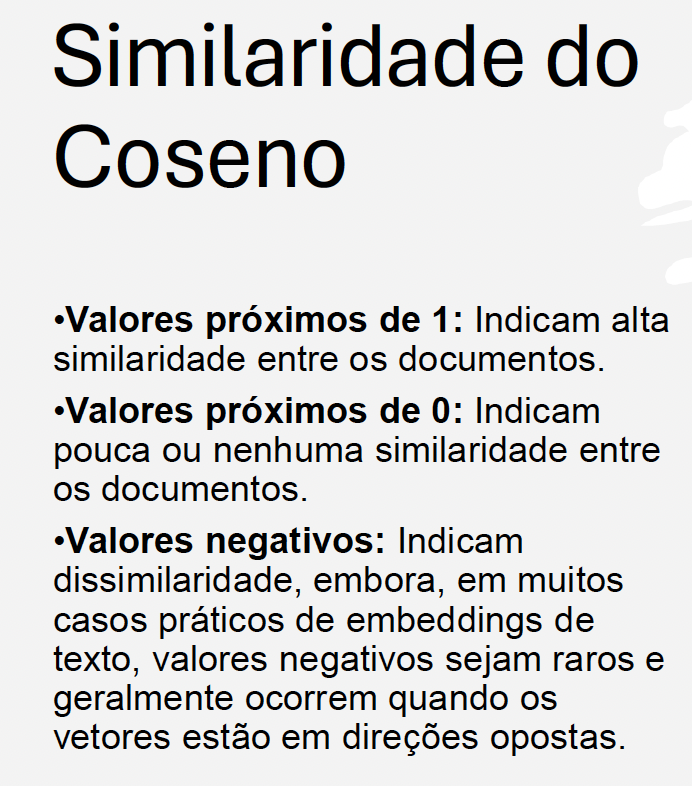

## Para que servem?

Os embeddings são amplamente usados em várias tarefas de NLP e aprendizado de máquina, incluindo:

- Análise Semântica:
    - Determinar a similaridade entre palavras, frases ou documentos.
- Sistemas de Recomendação:
    - Embeddings representam usuários e itens, ajudando a recomendar itens semelhantes.
- Pesquisa de Informações:
    - Indexação e busca eficiente de documentos semelhantes.
- Classificação de Texto:
    - Como entrada para classificar sentimentos, tópicos, etc.
- Tradução Automática:
    - Mapeamento de palavras entre idiomas diferentes.
- Chatbots e Assistentes Virtuais:
    - Representações vetoriais para melhorar a compreensão de linguagem.

## Aplicações Práticas

Os embeddings são usados em diferentes contextos e podem ser gerados por técnicas e modelos variados. 

### 1. Word Embeddings

Word embeddings são representações vetoriais de palavras que capturam semântica com base em sua coocorrência em textos. **Essas técnicas não levam o contexto da frase em consideração**, ou seja, **uma palavra terá sempre o mesmo vetor**, independentemente do significado contextual.

#### Técnicas e Modelos:

##### **Word2Vec**:

Método de aprendizado não supervisionado para gerar vetores de palavras.

- Duas arquiteturas principais:
    - CBOW (Continuous Bag of Words): Prediz uma palavra a partir do seu contexto.
    - Skip-gram: Prediz palavras de contexto a partir de uma palavra central.

###### Exemplo:
- "rei" - "homem" + "mulher" ≈ "rainha" (relações semânticas aritméticas).

##### **GloVe** (Global Vectors for Word Representation):

Utiliza a frequência de coocorrência de palavras em um grande corpus para criar embeddings. Constrói uma matriz de coocorrência global e fatoriza essa matriz.

##### **FastText**:

Expande Word2Vec ao trabalhar com subpalavras (n-gramas), permitindo generalização melhor para palavras raras ou desconhecidas. Útil para idiomas com rica morfologia.

#### Principais Aplicações:
- Sistemas de busca.
- Reconhecimento de similaridade semântica entre palavras.
- Análise de sentimentos.

### 2. Contextual Embeddings
Ao contrário de word embeddings, os **embeddings contextuais levam o contexto da palavra em consideração**. A mesma palavra pode ter diferentes vetores dependendo da frase.

#### Técnicas e Modelos:

##### **BERT** (Bidirectional Encoder Representations from Transformers):

Modelo de aprendizado profundo baseado em Transformers. Gera embeddings que **consideram o contexto bidirecional** (à esquerda e à direita da palavra na frase).
- Exemplo:
    - "banco" em "sentou no banco" terá um vetor diferente de "banco" em "abriu uma conta no banco".

##### **GPT** (Generative Pre-trained Transformer):

Modelo também baseado em Transformers, mas foca em aprendizado **contextual unidirecional** (olhando apenas para o passado na sequência). **Útil em tarefas como geração de texto.**

##### **ELMo** (Embeddings from Language Models):

Modelo baseado em redes neurais recorrentes (RNNs). **Gera embeddings de palavras sensíveis ao contexto em frases.**

#### Principais Aplicações:
- Resolução de ambiguidade semântica.
- Tradução automática.
- Sistemas de pergunta e resposta (chatbots, assistentes virtuais).

### 3. Representação de Documentos
Esses métodos **criam embeddings** não apenas para palavras, mas **para sentenças, parágrafos ou documentos inteiros**.

#### Técnicas e Modelos:

##### **Doc2Vec**:

Extensão do Word2Vec, que aprende embeddings para documentos. **Representa cada documento como um vetor único que captura seu significado geral.**

##### **Universal Sentence Encoder** (USE):

Criado pelo Google. **Gera embeddings de sentenças e documentos.** Baseado em modelos do tipo Transformer ou redes neurais profundas.
Focado em **capturar relações semânticas entre sentenças.**

#### Principais Aplicações:
- Pesquisa e recuperação de informações (ex.: Google Search).
- Similaridade de documentos (ex.: encontrar artigos semelhantes).
- Resumos automáticos.

### 4. Multimodalidade
A multimodalidade **combina diferentes tipos de dados (texto, imagem, áudio) em embeddings conjuntos.**

#### Técnicas e Modelos:

##### **CLIP** (Contrastive Language-Image Pretraining):
Criado pela OpenAI. Treinado em pares de imagens e descrições textuais.
**Cria um espaço vetorial compartilhado onde imagens e textos relacionados estão próximos.**
- Exemplo:
    - "Uma foto de um gato" estará perto da representação vetorial da imagem correspondente.

#### Principais Aplicações:
- Pesquisa multimodal (ex.: buscar uma imagem com base em uma descrição textual).
- Reconhecimento de objetos em imagens com base em texto.
- Criação de conteúdo criativo combinando texto e imagem.


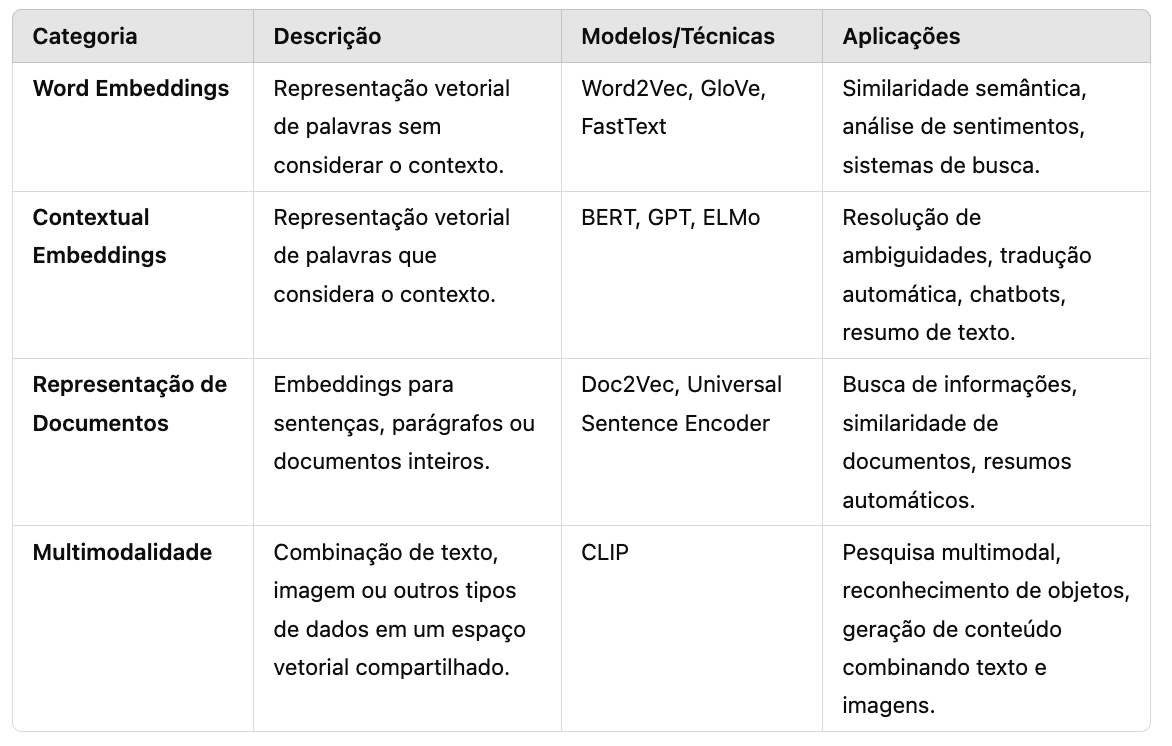

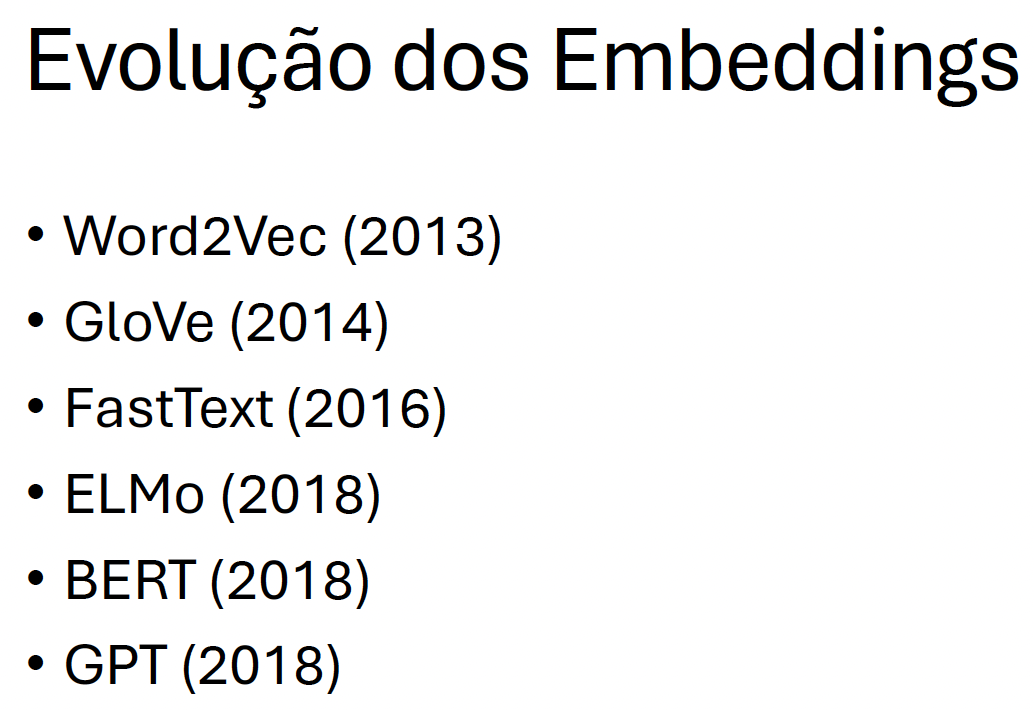

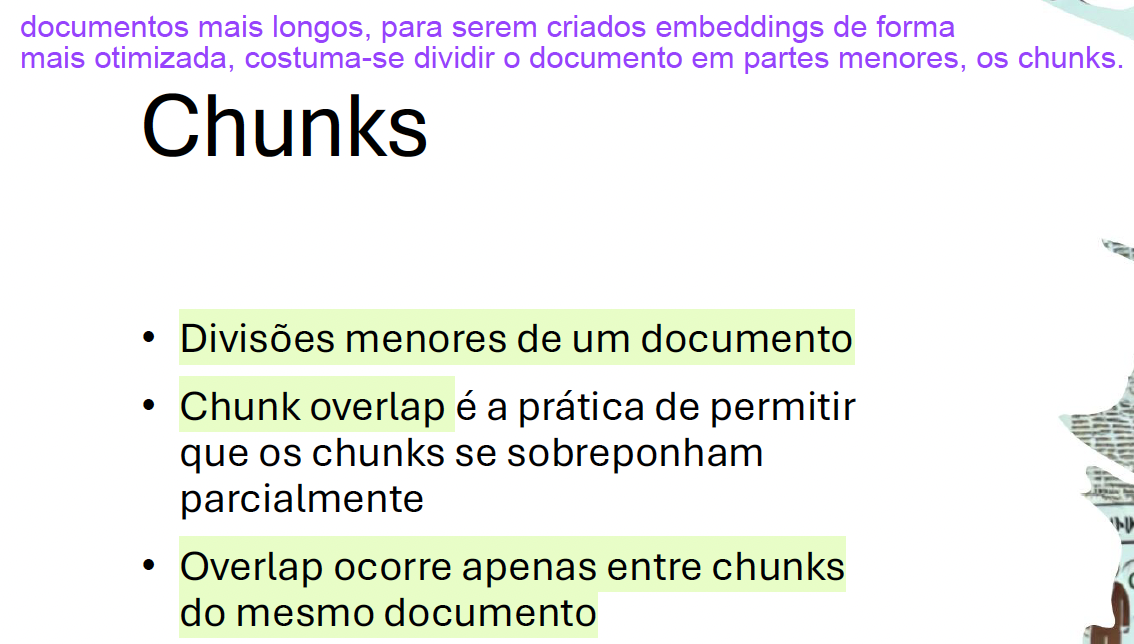

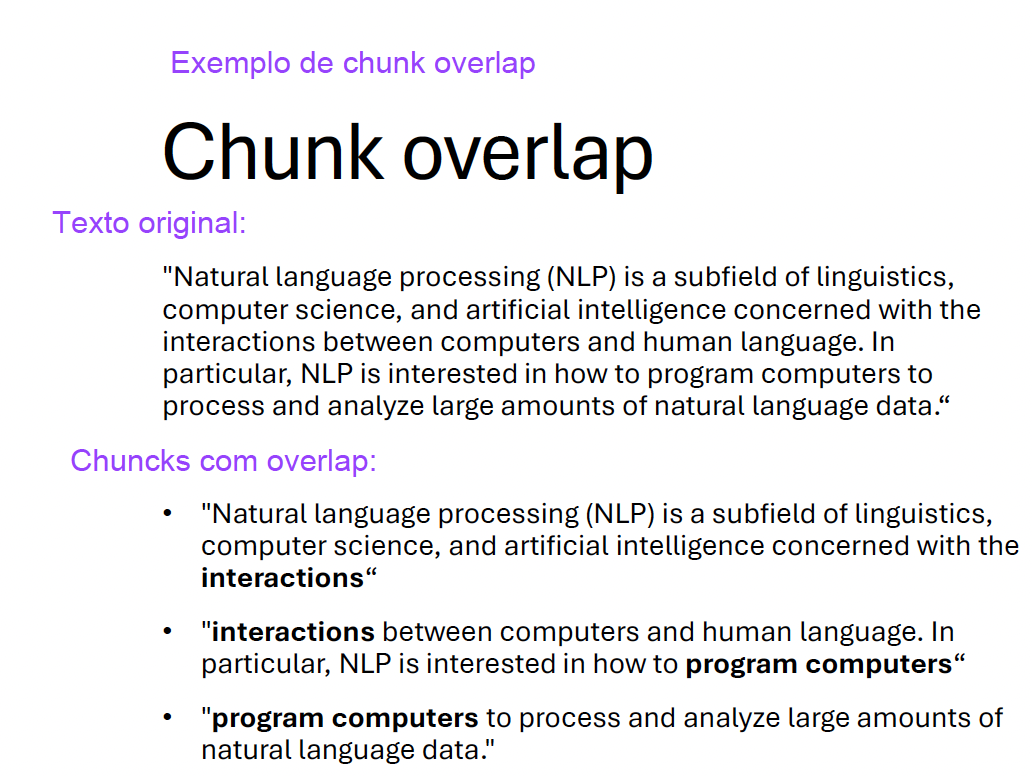

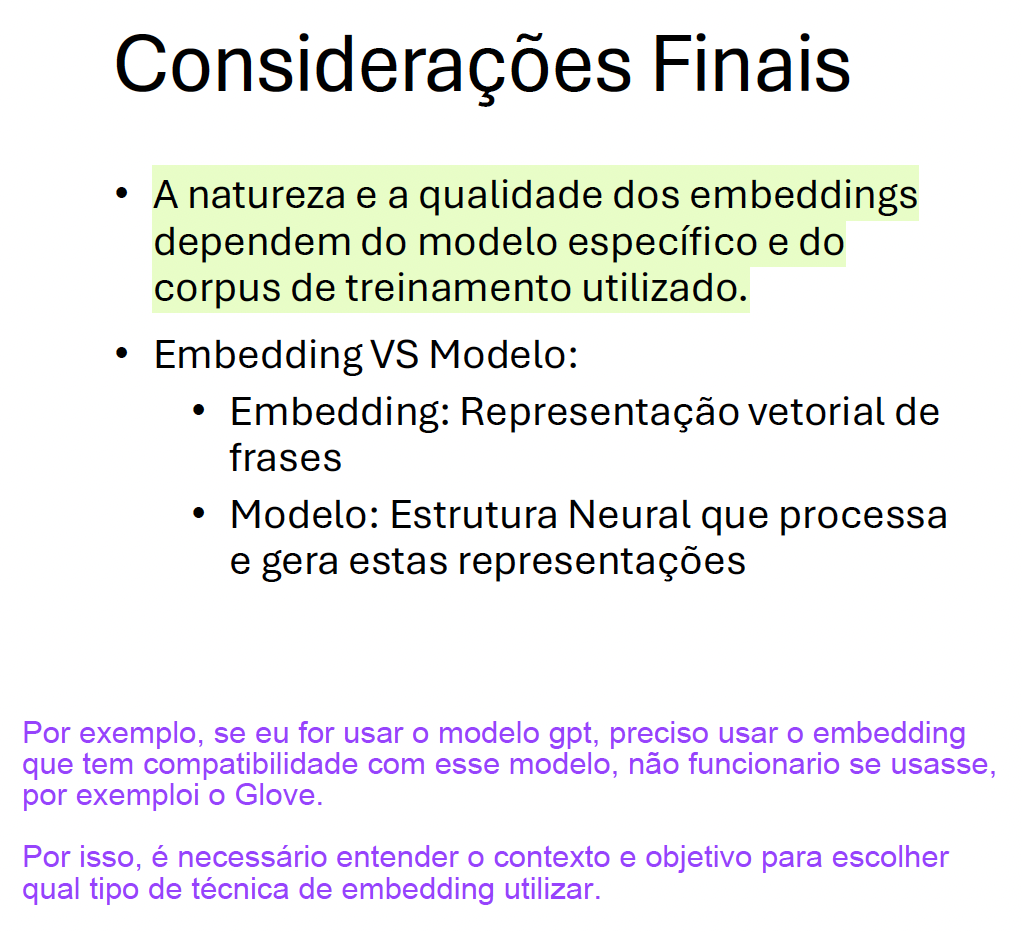

# Setup

In [3]:
# importando as bibliotecas

import os
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from numpy import dot, array
from numpy.linalg import norm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import yaml

In [4]:
# lendo o arquivo config.yaml para ter acesso a chave de acesso da OpenAI

with open('config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)
os.environ['OPENAI_API_KEY'] = config['OPENAI_API_KEY']

# Embedding

In [5]:
# Documentos utilizado no exemplo. Como é uma lista, é considerado como 3 documentos, que são os elementos da lista

documents = [
    "Este é o primeiro documento. Ele contém informações importantes sobre o projeto.",
    "Este é o segundo documento. Ele contém informações importantes sobre o projeto.",
    "O terceiro documento oferece uma visão geral dos resultados esperados e métricas de sucesso."
]

### Exemplo com a divisão de chunk sendo 1 chunk por texto

- foi propositalmente o chunk_size foi setado em um tamanho que englobe todo os três textos indicado na lista documents.

In [8]:
# Divisão dos documentos em chunks - Nesse caso, o chunk_size foi setado com valor maior que o texto, para que cada texto seja um chunk
# para conseguir observar a similaridade entre os documentos.
# no código abaixo, os parametros foram reajustados e é possível ver a divisão em chunks.

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, # tamanho do chunck  
    chunk_overlap=100, # qtde de caracteres aceitos de overlap
    length_function=len
)
chunks = text_splitter.create_documents(documents)

print("\nChunks gerados:")
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}: {chunk.page_content}")


Chunks gerados:
Chunk 1: Este é o primeiro documento. Ele contém informações importantes sobre o projeto.
Chunk 2: Este é o segundo documento. Ele contém informações importantes sobre o projeto.
Chunk 3: O terceiro documento oferece uma visão geral dos resultados esperados e métricas de sucesso.


In [9]:
print(f"\nNúmero total de chunks: {len(chunks)}") # imprimindo o número de chunks


Número total de chunks: 3


In [10]:
# Instanciando um objeto de OpenAIEmbeddings e indicando qual modelo será utilizado para gerar os embeddings
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')
print(embeddings) # imprimindo o objeto gerado

client=<openai.resources.embeddings.Embeddings object at 0x135addd60> async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x135adfe60> model='text-embedding-ada-002' dimensions=None deployment='text-embedding-ada-002' openai_api_version='' openai_api_base=None openai_api_type='' openai_proxy='' embedding_ctx_length=8191 openai_api_key=SecretStr('**********') openai_organization=None allowed_special=None disallowed_special=None chunk_size=1000 max_retries=2 request_timeout=None headers=None tiktoken_enabled=True tiktoken_model_name=None show_progress_bar=False model_kwargs={} skip_empty=False default_headers=None default_query=None retry_min_seconds=4 retry_max_seconds=20 http_client=None http_async_client=None check_embedding_ctx_length=True


In [11]:
# Aplicação do embedding sobre as chunks com o embed_documents

embedded_chunks = embeddings.embed_documents([chunk.page_content for chunk in chunks])

In [12]:
# Mostrando alguns dos embeddings gerados

print("\nEmbeddings gerados (mostrando apenas os primeiros 5 elementos de cada):")
for i, embed in enumerate(embedded_chunks):
    print(f"Embedding {i+1}: {embed[:5]}...")


Embeddings gerados (mostrando apenas os primeiros 5 elementos de cada):
Embedding 1: [-0.004047889728099108, 0.006929385010153055, -0.022675706073641777, -0.03213227912783623, 0.005292670335620642]...
Embedding 2: [-0.008207511156797409, 0.011360358446836472, -0.01531563326716423, -0.025829335674643517, 0.007063893601298332]...
Embedding 3: [-0.03095163032412529, 0.004530748818069696, 0.009685111232101917, -0.03003530018031597, 0.025530004873871803]...


In [13]:
print(f"\nNúmero de elementos em cada embedding: {len(embedded_chunks[0])}") # em cada vetor tem 1536 posições
# Essa qtde de elementos em cada embedding (1536) depende do modelo utilizado


Número de elementos em cada embedding: 1536


In [14]:
# Função que calcula a similaridade entre os vetores, no caso, usando a similaridade Cosseno

def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [15]:
# Calculando (chamando a função cosine_similarity) e visualizando a similaridade entre todos os chuncks

print("\nSimilaridades entre todos os chunks:") 
similarities = []
for i in range(len(embedded_chunks)):
    for j in range(i + 1, len(embedded_chunks)):
        similarity = cosine_similarity(embedded_chunks[i], embedded_chunks[j])
        similarities.append((i, j, similarity))
        print(f"Similaridade entre o chunk {i+1} e o chunk {j+1}: {similarity:.2f}")


Similaridades entre todos os chunks:
Similaridade entre o chunk 1 e o chunk 2: 0.96
Similaridade entre o chunk 1 e o chunk 3: 0.86
Similaridade entre o chunk 2 e o chunk 3: 0.87


# Visualização

In [16]:
# Converte os embeddings: embedded_chunks em um array numpy

embedded_chunks_array = array(embedded_chunks)

In [17]:
# utilizando a técnica PCA para reduzir a dimensionalidade do array

pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedded_chunks_array)

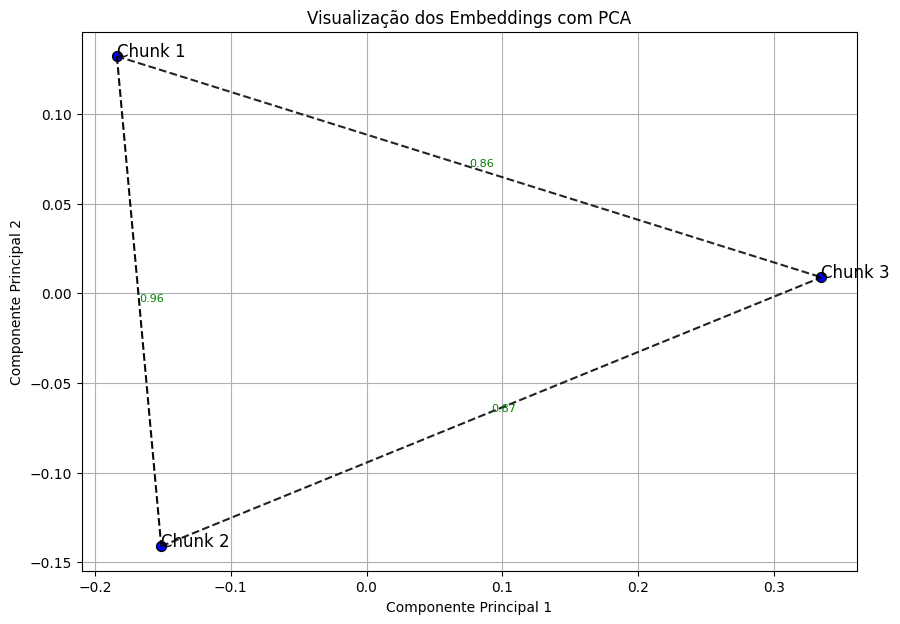

In [18]:
# Estruturando a visualização gráfica  com o uso da Técnica PCA (Principal Component Analysis)

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50)
for i, chunk in enumerate(chunks):
    plt.text(pca_result[i, 0], pca_result[i, 1], f'Chunk {i+1}', fontsize=12)
for (i, j, similarity) in similarities:
    plt.plot([pca_result[i, 0], pca_result[j, 0]], [pca_result[i, 1], pca_result[j, 1]], 'k--', alpha=similarity)
    mid_x = (pca_result[i, 0] + pca_result[j, 0]) / 2
    mid_y = (pca_result[i, 1] + pca_result[j, 1]) / 2
    plt.text(mid_x, mid_y, f'{similarity:.2f}', fontsize=8, color='green')
plt.title('Visualização dos Embeddings com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [19]:
# utilizando a técnica TSNE para reduzir a dimensionalidade do array

tsne = TSNE(n_components=2, perplexity=2, max_iter=300)
tsne_result = tsne.fit_transform(embedded_chunks_array)

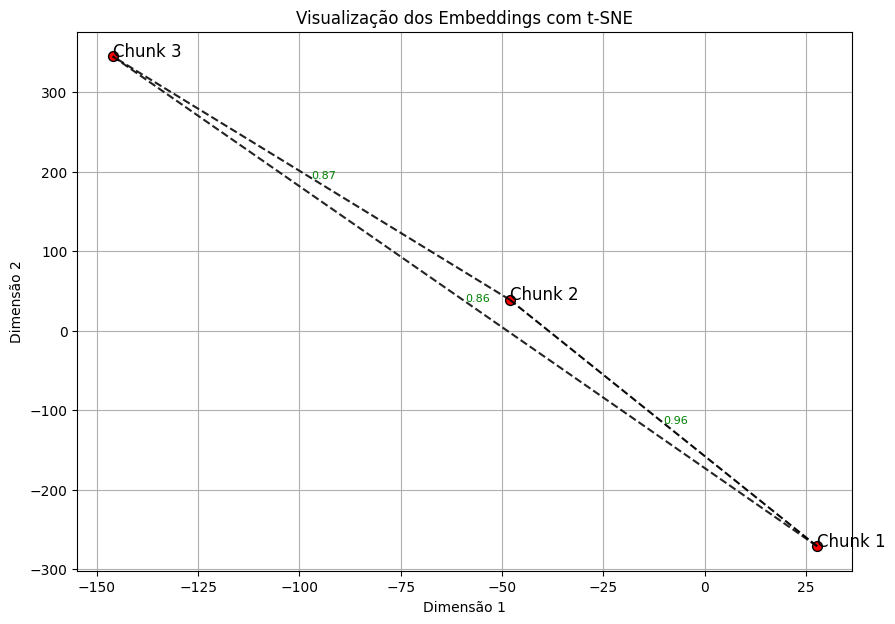

In [20]:
# Estruturando a visualização gráfica  com o uso da Técnica TSNE (t-Distributed Stochastic Neighbor Embedding)

plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red', edgecolor='k', s=50)
for i, chunk in enumerate(chunks):
    plt.text(tsne_result[i, 0], tsne_result[i, 1], f'Chunk {i+1}', fontsize=12)
for (i, j, similarity) in similarities:
    plt.plot([tsne_result[i, 0], tsne_result[j, 0]], [tsne_result[i, 1], tsne_result[j, 1]], 'k--', alpha=similarity)
    mid_x = (tsne_result[i, 0] + tsne_result[j, 0]) / 2
    mid_y = (tsne_result[i, 1] + tsne_result[j, 1]) / 2
    plt.text(mid_x, mid_y, f'{similarity:.2f}', fontsize=8, color='green')
plt.title('Visualização dos Embeddings com t-SNE')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.grid(True)
plt.show()

### Exemplo com a divisão de chunks 

- foi propositalmente o chunk_size foi setado em um tamanho de forma que se obtenha mais de um chunk por documento.

In [24]:
# Divisão dos documentos em chunks
# os parametros foram reajustados e é possível ver a divisão em chunks.

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=50, # tamanho do chunck  
    chunk_overlap=10, # qtde de caracteres aceitos de overlap
    length_function=len
)
chunks_1 = text_splitter.create_documents(documents)

print("\nChunks gerados:")
for i, chunk in enumerate(chunks_1):
    print(f"Chunk {i+1}: {chunk.page_content}")

# observe que o documento 2, presete nos chunks 3 e 4 não tem overlap, pois a palavra 'informações' tem excede o tamanho determinado no parametro
# chunk_overlap=10.
# se mudar para chunk_overlap=12, o já tem o overlap para esse exemplo.


Chunks gerados:
Chunk 1: Este é o primeiro documento. Ele contém
Chunk 2: contém informações importantes sobre o projeto.
Chunk 3: Este é o segundo documento. Ele contém informações
Chunk 4: importantes sobre o projeto.
Chunk 5: O terceiro documento oferece uma visão geral dos
Chunk 6: geral dos resultados esperados e métricas de
Chunk 7: de sucesso.


In [25]:
print(f"\nNúmero total de chunks: {len(chunks_1)}") # imprimindo o número de chunks


Número total de chunks: 7


In [26]:
# Instanciando um objeto de OpenAIEmbeddings e indicando qual modelo será utilizado para gerar os embeddings
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')
print(embeddings) # imprimindo o objeto gerado

client=<openai.resources.embeddings.Embeddings object at 0x13615a510> async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x135f35bb0> model='text-embedding-ada-002' dimensions=None deployment='text-embedding-ada-002' openai_api_version='' openai_api_base=None openai_api_type='' openai_proxy='' embedding_ctx_length=8191 openai_api_key=SecretStr('**********') openai_organization=None allowed_special=None disallowed_special=None chunk_size=1000 max_retries=2 request_timeout=None headers=None tiktoken_enabled=True tiktoken_model_name=None show_progress_bar=False model_kwargs={} skip_empty=False default_headers=None default_query=None retry_min_seconds=4 retry_max_seconds=20 http_client=None http_async_client=None check_embedding_ctx_length=True


In [27]:
# Aplicação do embedding sobre as chunks com o embed_documents

embedded_chunks_1 = embeddings.embed_documents([chunk.page_content for chunk in chunks_1])

In [28]:
# Mostrando alguns dos embeddings gerados

print("\nEmbeddings gerados (mostrando apenas os primeiros 5 elementos de cada):")
for i, embed in enumerate(embedded_chunks_1):
    print(f"Embedding {i+1}: {embed[:5]}...")


Embeddings gerados (mostrando apenas os primeiros 5 elementos de cada):
Embedding 1: [-0.0018670230638235807, 0.017166996374726295, 0.0011514644138514996, -0.020769629627466202, 0.0009896024130284786]...
Embedding 2: [-0.01712298020720482, 0.0015327243600040674, -0.008258078247308731, -0.026528745889663696, 0.005497690290212631]...
Embedding 3: [-0.003141103545203805, 0.026634005829691887, 0.009834683500230312, -0.03525689244270325, -0.007334556430578232]...
Embedding 4: [-0.004651214927434921, -0.013015211559832096, -0.007951086387038231, -0.028801359236240387, 0.01733541488647461]...
Embedding 5: [-0.01769501157104969, -0.0068399785086512566, 0.0027431845664978027, -0.02135695144534111, 0.03167577087879181]...
Embedding 6: [-0.024612564593553543, 0.003631029510870576, 0.01579531654715538, -0.025423968210816383, 0.010710523463785648]...
Embedding 7: [-0.030650222674012184, -0.020634496584534645, 0.027425264939665794, -0.02991608716547489, -0.016518084332346916]...


In [29]:
print(f"\nNúmero de elementos em cada embedding: {len(embedded_chunks[0])}") # em cada vetor tem 1536 posições. 
# Essa qtde de elementos em cada embedding (1536) depende do modelo utilizado


Número de elementos em cada embedding: 1536


In [30]:
# Função que calcula a similaridade entre os vetores, no caso, usando a similaridade Cosseno

def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [31]:
# Calculando (chamando a função cosine_similarity) e visualizando a similaridade entre todos os chuncks

print("\nSimilaridades entre todos os chunks:") 
similarities = []
for i in range(len(embedded_chunks_1)):
    for j in range(i + 1, len(embedded_chunks_1)):
        similarity = cosine_similarity(embedded_chunks_1[i], embedded_chunks_1[j])
        similarities.append((i, j, similarity))
        print(f"Similaridade entre o chunk {i+1} e o chunk {j+1}: {similarity:.2f}")


Similaridades entre todos os chunks:
Similaridade entre o chunk 1 e o chunk 2: 0.83
Similaridade entre o chunk 1 e o chunk 3: 0.90
Similaridade entre o chunk 1 e o chunk 4: 0.81
Similaridade entre o chunk 1 e o chunk 5: 0.83
Similaridade entre o chunk 1 e o chunk 6: 0.77
Similaridade entre o chunk 1 e o chunk 7: 0.78
Similaridade entre o chunk 2 e o chunk 3: 0.86
Similaridade entre o chunk 2 e o chunk 4: 0.94
Similaridade entre o chunk 2 e o chunk 5: 0.81
Similaridade entre o chunk 2 e o chunk 6: 0.78
Similaridade entre o chunk 2 e o chunk 7: 0.81
Similaridade entre o chunk 3 e o chunk 4: 0.81
Similaridade entre o chunk 3 e o chunk 5: 0.85
Similaridade entre o chunk 3 e o chunk 6: 0.78
Similaridade entre o chunk 3 e o chunk 7: 0.78
Similaridade entre o chunk 4 e o chunk 5: 0.80
Similaridade entre o chunk 4 e o chunk 6: 0.79
Similaridade entre o chunk 4 e o chunk 7: 0.84
Similaridade entre o chunk 5 e o chunk 6: 0.80
Similaridade entre o chunk 5 e o chunk 7: 0.77
Similaridade entre o c

# Visualização

In [32]:
# Converte os embeddings: embedded_chunks em um array numpy

embedded_chunks_array_1 = array(embedded_chunks_1)

In [33]:
# utilizando a técnica PCA para reduzir a dimensionalidade do array

pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedded_chunks_array_1)

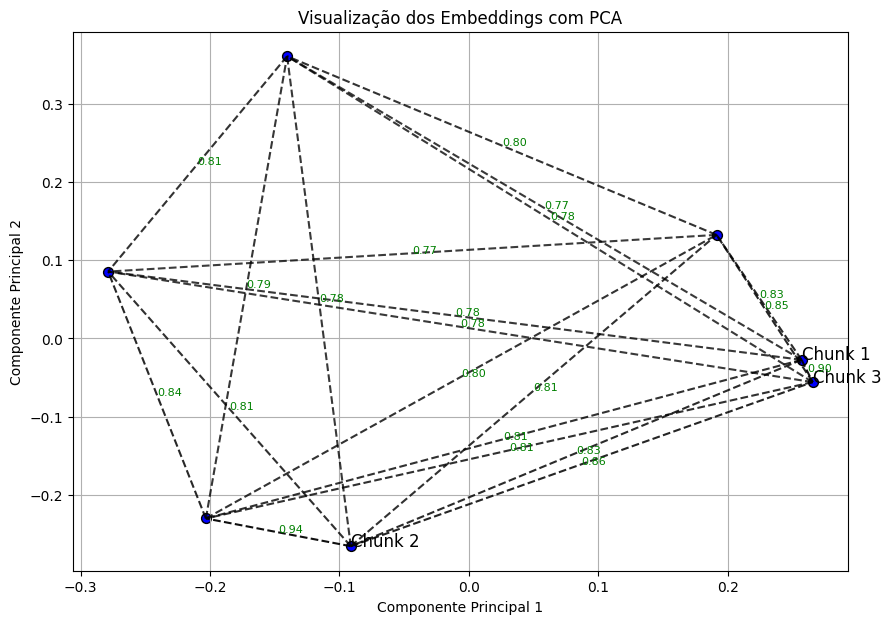

In [34]:
# Estruturando a visualização gráfica  com o uso da Técnica PCA (Principal Component Analysis)

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50)
for i, chunk in enumerate(chunks):
    plt.text(pca_result[i, 0], pca_result[i, 1], f'Chunk {i+1}', fontsize=12)
for (i, j, similarity) in similarities:
    plt.plot([pca_result[i, 0], pca_result[j, 0]], [pca_result[i, 1], pca_result[j, 1]], 'k--', alpha=similarity)
    mid_x = (pca_result[i, 0] + pca_result[j, 0]) / 2
    mid_y = (pca_result[i, 1] + pca_result[j, 1]) / 2
    plt.text(mid_x, mid_y, f'{similarity:.2f}', fontsize=8, color='green')
plt.title('Visualização dos Embeddings com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [35]:
# utilizando a técnica TSNE para reduzir a dimensionalidade do array

tsne = TSNE(n_components=2, perplexity=2, max_iter=300)
tsne_result = tsne.fit_transform(embedded_chunks_array_1)

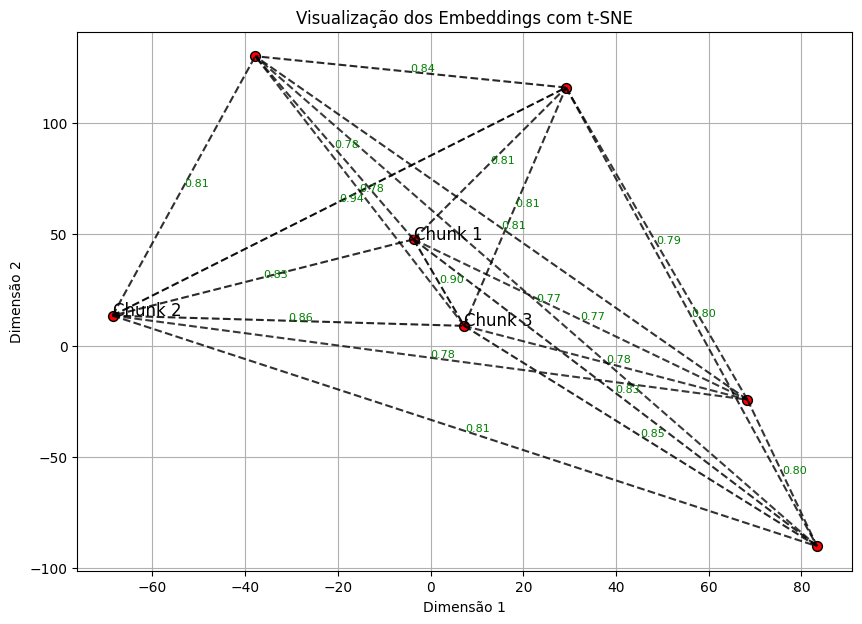

In [36]:
# Estruturando a visualização gráfica  com o uso da Técnica TSNE (t-Distributed Stochastic Neighbor Embedding)

plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red', edgecolor='k', s=50)
for i, chunk in enumerate(chunks):
    plt.text(tsne_result[i, 0], tsne_result[i, 1], f'Chunk {i+1}', fontsize=12)
for (i, j, similarity) in similarities:
    plt.plot([tsne_result[i, 0], tsne_result[j, 0]], [tsne_result[i, 1], tsne_result[j, 1]], 'k--', alpha=similarity)
    mid_x = (tsne_result[i, 0] + tsne_result[j, 0]) / 2
    mid_y = (tsne_result[i, 1] + tsne_result[j, 1]) / 2
    plt.text(mid_x, mid_y, f'{similarity:.2f}', fontsize=8, color='green')
plt.title('Visualização dos Embeddings com t-SNE')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.grid(True)
plt.show()